# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.5 MB/s eta 0:00:00


In [2]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [15]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [10]:
os.listdir(data_dir)

['sad', '.ipynb_checkpoints', 'happy']

In [11]:
rmdir /content/data/.ipynb_checkpoints

In [12]:
os.listdir(data_dir)

['sad', 'happy']

In [13]:
os.listdir(os.path.join(data_dir,'happy'))

['images405.jpg',
 'happy-indians_5f66fd46d9f5b.jpg',
 'images359.jpg',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.jpg',
 'images258.jpg',
 'images107.jpg',
 'images291.jpg',
 'images62.jpg',
 'images649.jpg',
 'images47.jpg',
 'what-makes-people-happy.jpeg',
 'images.jpg',
 'images683.jpg',
 'images462.jpg',
 'images602.jpg',
 'images384.jpg',
 'images466.jpg',
 'images347.jpg',
 'images591.jpg',
 'images20.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 'getty_152414899_97046097045006_68075.jpg',
 'images53.jpg',
 'happy-people-funny-isolated-over-white-background-35582466.jpg',
 'images525.jpg',
 'habits-of-happy-people.jpg',
 'ce529eea8c0ca9987656fa90474563d6.jpg',
 'images563.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'portrait-young-father-carrying-his-260nw-736997836.jpg',
 'images622.jpg',
 'happy-person-1024x768.jpeg',
 'images339.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.j

In [14]:
os.listdir(os.path.join(data_dir,'sad'))

['images316.jpg',
 'secret-signs-of-loneliness-01-1440x810.jpg',
 'images137.jpg',
 'images359.jpg',
 'portrait-sad-man-260nw-126009806.jpg',
 'images47.jpg',
 'images.jpg',
 'images561.jpg',
 'images384.jpg',
 'images393.jpg',
 'images434.jpg',
 'images513.jpg',
 'images553.jpg',
 'sad-woman.jpg',
 'images530.jpg',
 'images607.jpg',
 'sad-group-people-problems-17033671.jpg',
 'images490.jpg',
 'depressed-man-studio-shot-260nw-404652526.jpg',
 'sad.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 'man-tears-tear-look.jpg',
 'images143.jpg',
 'aid12707023-v4-1200px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'images220.jpg',
 'images619.jpg',
 'images120.jpg',
 'images489.jpg',
 '39843138-sad-man.jpg',
 'images526.jpg',
 'images205.jpg',
 '640px-Crying-girl.jpg',
 'sad-person-concept-vector-26538685.jpg',
 'images463.jpg',
 'images147.jpg',
 'images176.jpg',
 '8iAb9k4aT.jpg',
 'artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg',
 '1694806.jpg',
 'images86.jpg',
 'images148.jpg',
 'depression-1020

In [16]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/sad/secret-signs-of-loneliness-01-1440x810.jpg
Image not in ext list data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list data/sad/depressed-man-studio-shot-260nw-404652526.jpg
Image not in ext list data/sad/39843138-sad-man.jpg
Image not in ext list data/sad/crying-sad.gif
Image not in ext list data/sad/set-faces-crying-person-different-260nw-659640793.jpg
Image not in ext list data/sad/sad-girl-park-cartoon-color-260nw-1026254521.jpg
Image not in ext list data/sad/v4-460px-Use-Calming-Techniques-to-Help-Autistic-People-Step-7.jpg.webp
Image not in ext list data/sad/feeling-sad-depressed-people-problems-600w-1186386160.jpg
Image not in ext list data/sad/Sad-People-Bad-People-Luckie-1050x700.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/sad/dep

In [17]:
img = cv2.imread(os.path.join('data','happy','1902544.jpg'))

In [18]:
img.shape

(1200, 1920, 3)

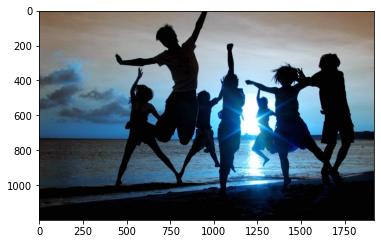

In [19]:
plt.imshow(img)

### Python read the color as BGR so we can convert it to RGB so that the colors are shown as original

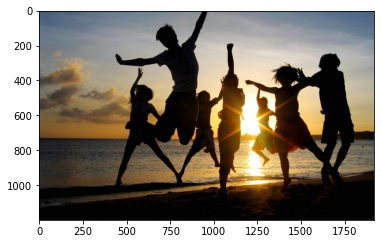

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. Load Data

In [23]:
import numpy as np

In [68]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 473 files belonging to 2 classes.


In [80]:
tf.keras.utils.image_dataset_from_directory??

## This code does a lot of preprocessing stuff on the images.

In [60]:
data_iterator = data.as_numpy_iterator()

In [61]:
batch = data_iterator.next()

In [62]:
data_iterator

In [32]:
batch

(array([[[[224.93555  , 209.9414   , 166.92969  ],
          [213.29688  , 199.29688  , 154.29688  ],
          [174.43945  , 160.43945  , 115.322266 ],
          ...,
          [255.       , 241.73633  , 228.14648  ],
          [255.       , 240.03516  , 217.19336  ],
          [252.01758  , 236.02344  , 213.02344  ]],
 
         [[236.14279  , 221.14493  , 178.14066  ],
          [181.97578  , 167.35025  , 123.60131  ],
          [172.47086  , 158.47086  , 113.39097  ],
          ...,
          [204.06001  , 187.01334  , 173.40485  ],
          [200.92368  , 185.89168  , 164.30093  ],
          [199.16246  , 182.53534  , 161.44176  ]],
 
         [[221.08063  , 204.89934  , 163.07599  ],
          [183.29109  , 167.51266  , 124.48445  ],
          [159.78064  , 144.59705  ,  99.93299  ],
          ...,
          [157.20905  , 139.24536  , 125.97452  ],
          [145.34662  , 131.0723   , 111.75266  ],
          [136.69821  , 120.10678  , 101.67905  ]],
 
         ...,
 
         [[1

In [33]:
len(batch)

2

In [36]:
## Images represented as nympy arrays
batch[0].shape

(32, 256, 256, 3)

In [38]:
## Labels the images as happy and sad
batch[1]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

#### The labels are given to the images automatically to find out 0 and 1 is assigned to happy or sad we can run the below code

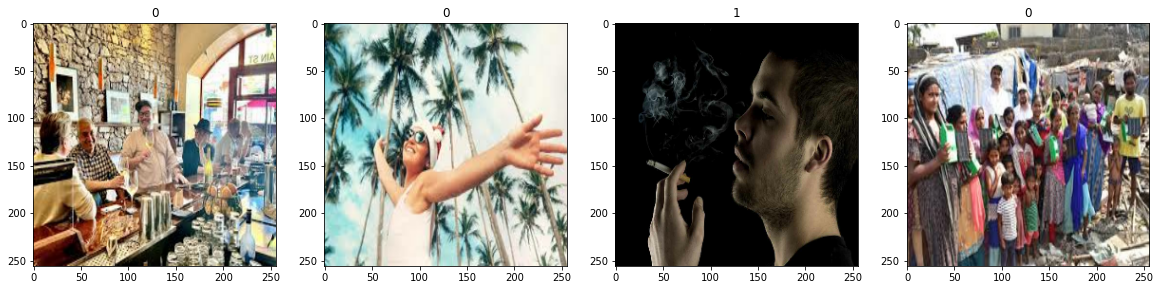

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### So we can see that class 1 = sad class 0 happy .Getting another batch of data and checking

In [40]:
batch = data_iterator.next()

In [42]:
batch[0].shape

(32, 256, 256, 3)

In [43]:
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int32)

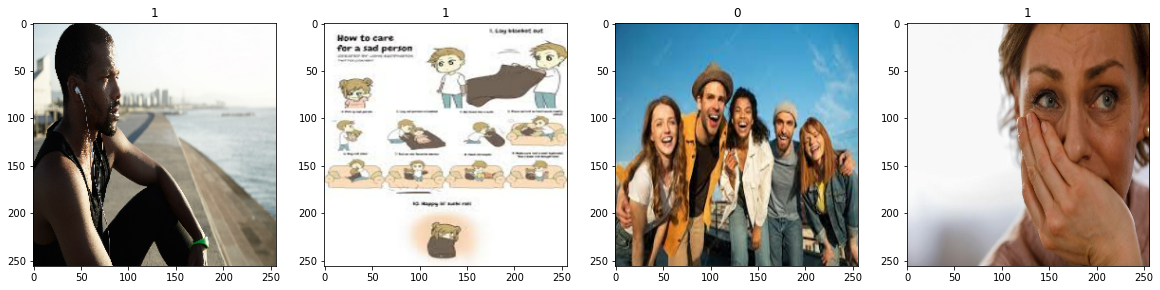

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data
### Scaling the data from 0-255 to 0-1 for optimization

In [69]:
data = data.map(lambda x,y: (x/255, y))

In [70]:
scaled_iterator = data.as_numpy_iterator()

In [71]:
batch = scaled_iterator.next()

In [72]:
batch[0].max()

1.0

In [73]:
data.as_numpy_iterator().next()

(array([[[[0.98014706, 0.889951  , 0.68602943],
          [0.972549  , 0.88235295, 0.6784314 ],
          [0.967402  , 0.8772059 , 0.6732843 ],
          ...,
          [0.98039216, 0.90588236, 0.7372549 ],
          [0.98039216, 0.90588236, 0.7372549 ],
          [0.98039216, 0.90588236, 0.7372549 ]],
 
         [[0.98014706, 0.889951  , 0.68602943],
          [0.972549  , 0.88235295, 0.6784314 ],
          [0.967402  , 0.8772059 , 0.6732843 ],
          ...,
          [0.98039216, 0.90588236, 0.7372549 ],
          [0.98039216, 0.90588236, 0.7372549 ],
          [0.98039216, 0.90588236, 0.7372549 ]],
 
         [[0.98014706, 0.889951  , 0.68602943],
          [0.972549  , 0.88235295, 0.6784314 ],
          [0.967402  , 0.8772059 , 0.6732843 ],
          ...,
          [0.98039216, 0.90588236, 0.7372549 ],
          [0.98039216, 0.90588236, 0.7372549 ],
          [0.98039216, 0.90588236, 0.7372549 ]],
 
         ...,
 
         [[0.98039216, 0.90588236, 0.7372549 ],
          [0.98039

In [74]:
batch[0].min()

0.0

In [75]:
batch[0].max()

1.0

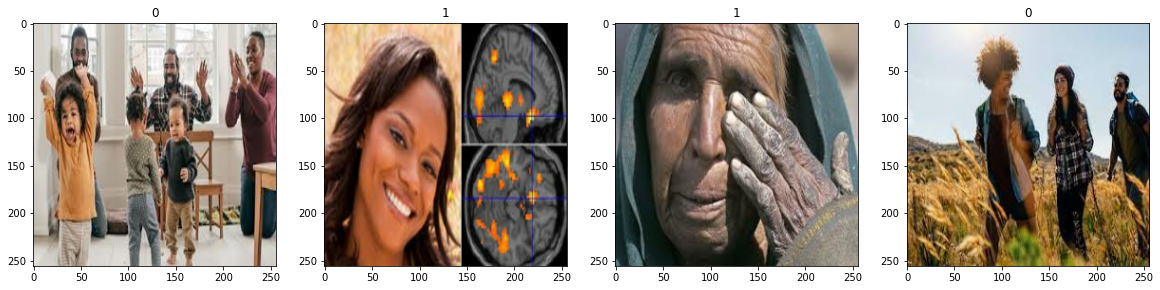

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data


In [81]:
## checking for the batch size. So we know that there are 15 batches and each batch has 32 images
len(data) 

15

In [84]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [85]:
print(train_size, val_size, test_size)

10 3 2


In [86]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model



In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [88]:
model = Sequential()

In [89]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [92]:
logdir='logs'

In [93]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 27s 2s/step - loss: 1.0666 - accuracy: 0.5500 - val_loss: 0.6460 - val_accuracy: 0.5729
Epoch 2/20
10/10 [==============================] - 24s 2s/step - loss: 0.6175 - accuracy: 0.6313 - val_loss: 0.6016 - val_accuracy: 0.6667
Epoch 3/20
10/10 [==============================] - 24s 2s/step - loss: 0.5644 - accuracy: 0.7094 - val_loss: 0.6992 - val_accuracy: 0.5833
Epoch 4/20
10/10 [==============================] - 25s 2s/step - loss: 0.5366 - accuracy: 0.7000 - val_loss: 0.4932 - val_accuracy: 0.7188
Epoch 5/20
10/10 [==============================] - 25s 2s/step - loss: 0.4835 - accuracy: 0.7125 - val_loss: 0.4475 - val_accuracy: 0.7917
Epoch 6/20
10/10 [==============================] - 24s 2s/step - loss: 0.4278 - accuracy: 0.8219 - val_loss: 0.3913 - val_accuracy: 0.8125
Epoch 7/20
10/10 [==============================] - 24s 2s/step - loss: 0.3802 - accuracy: 0.8438 - val_loss: 0.3265 - val_accuracy: 0.8125
Epoch 8/20
10/10 [==

# 8. Plot Performance

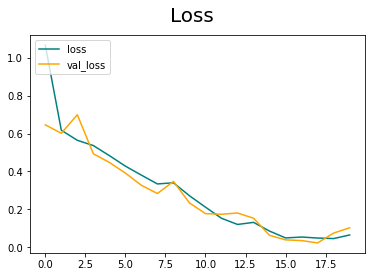

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

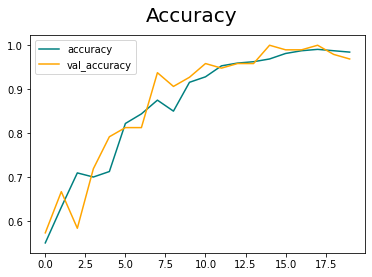

In [96]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 769ms/step


In [103]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9599999785423279, Recall:1.0, Accuracy:0.9824561476707458


# 10. Test


In [104]:
import cv2

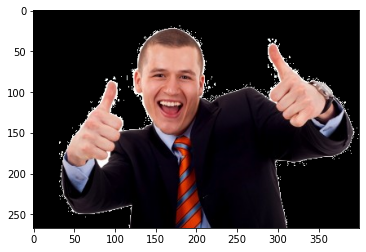

In [109]:
img = cv2.imread('happytest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

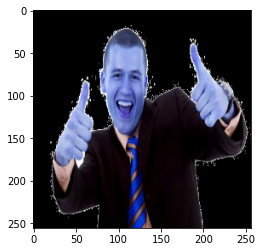

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 61ms/step


In [113]:
yhat

array([[0.20922907]], dtype=float32)

In [114]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## Test 2

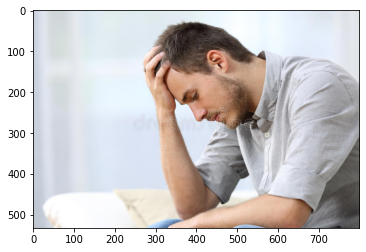

In [118]:
img1 = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

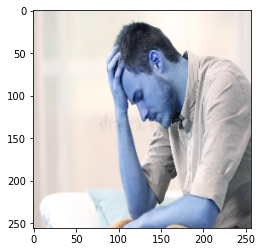

In [120]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [121]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 78ms/step


In [122]:
yhat

array([[0.8958787]], dtype=float32)

In [123]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
